Models 1-3

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data

In [46]:
df = pd.read_csv('data/AmesHousingCleaned.csv')

# Select features

View corr plots

In [47]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

In [48]:
df[numeric_columns].corr()

,order,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
order,1.000000,0.173593,0.011797,0.008748,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.031045,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
pid,0.173593,1.000000,-0.001281,-0.038104,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.225672,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
ms_subclass,0.011797,-0.001281,1.000000,-0.233959,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.003634,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
lot_frontage,0.008748,-0.038104,-0.233959,1.000000,0.136862,0.128840,-0.034675,0.026130,0.069509,0.109858,...,0.001162,0.085480,0.024824,0.004061,0.045789,0.109439,0.003098,0.017357,-0.011737,0.201875
lot_area,0.031354,0.034868,-0.204613,0.136862,1.000000,0.097188,-0.034759,0.023258,0.021682,0.125950,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
overall_qual,-0.048500,-0.263147,0.039419,0.128840,0.097188,1.000000,-0.094812,0.597027,0.569609,0.423089,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
overall_cond,-0.011054,0.104451,-0.067349,-0.034675,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.132472,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
year_built,-0.052319,-0.343388,0.036579,0.026130,0.023258,0.597027,-0.368773,1.000000,0.612095,0.306797,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
year_remod/add,-0.075566,-0.157111,0.043397,0.069509,0.021682,0.569609,0.047680,0.612095,1.000000,0.191740,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
mas_vnr_area,-0.031045,-0.225672,0.003634,0.109858,0.125950,0.423089,-0.132472,0.306797,0.191740,1.000000,...,0.165875,0.140003,-0.109915,0.014222,0.066817,0.004893,0.045276,-0.002358,-0.016876,0.502196


Heatmap

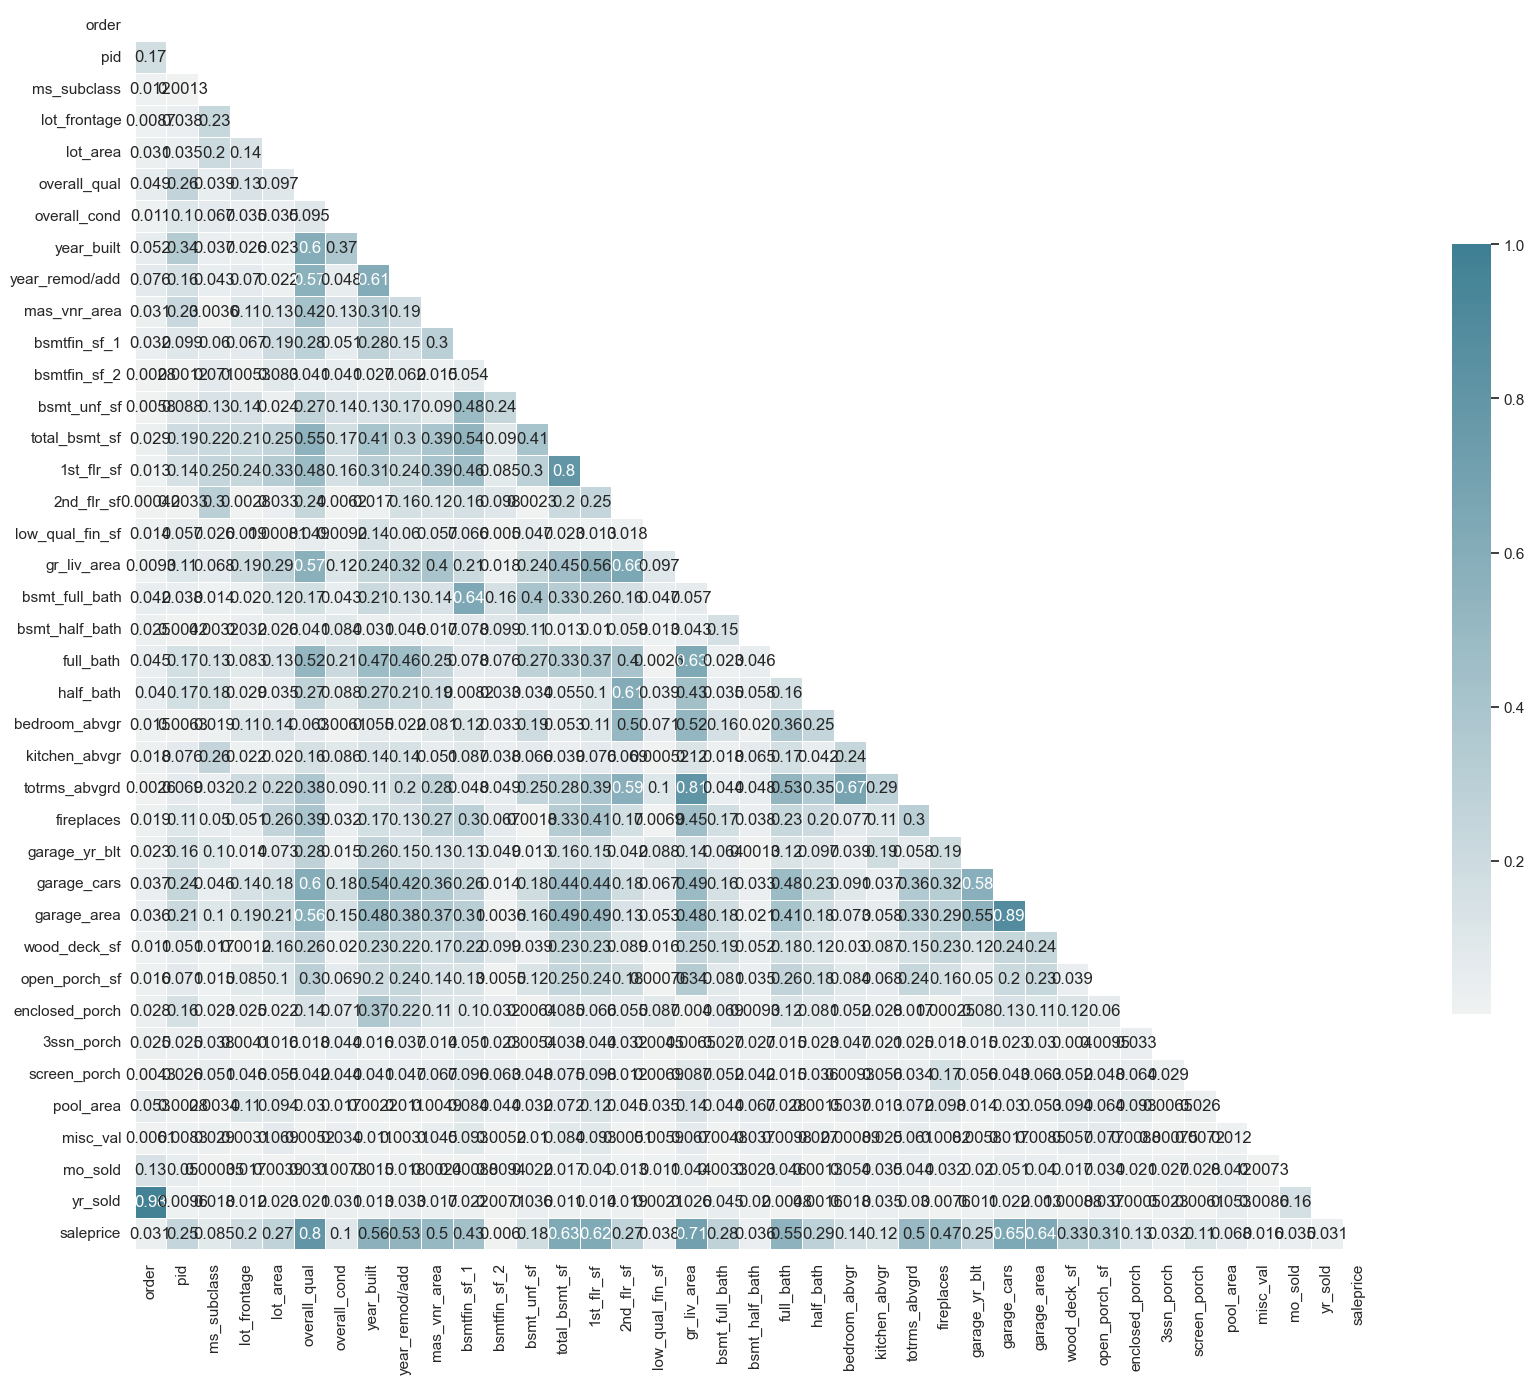

In [49]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[numeric_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool) # Return an array of zeros with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of arr

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(np.abs(corr), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5}); # annot argument adds numbers

plt.show()

Select most_corr_columns

In [50]:
most_corr_columns = df[numeric_columns].corr().nlargest(10, 'saleprice')['saleprice'].index

most_corr_columns

Index(['saleprice', 'overall_qual', 'gr_liv_area', 'garage_cars',
       'garage_area', 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add'],
      dtype='object')

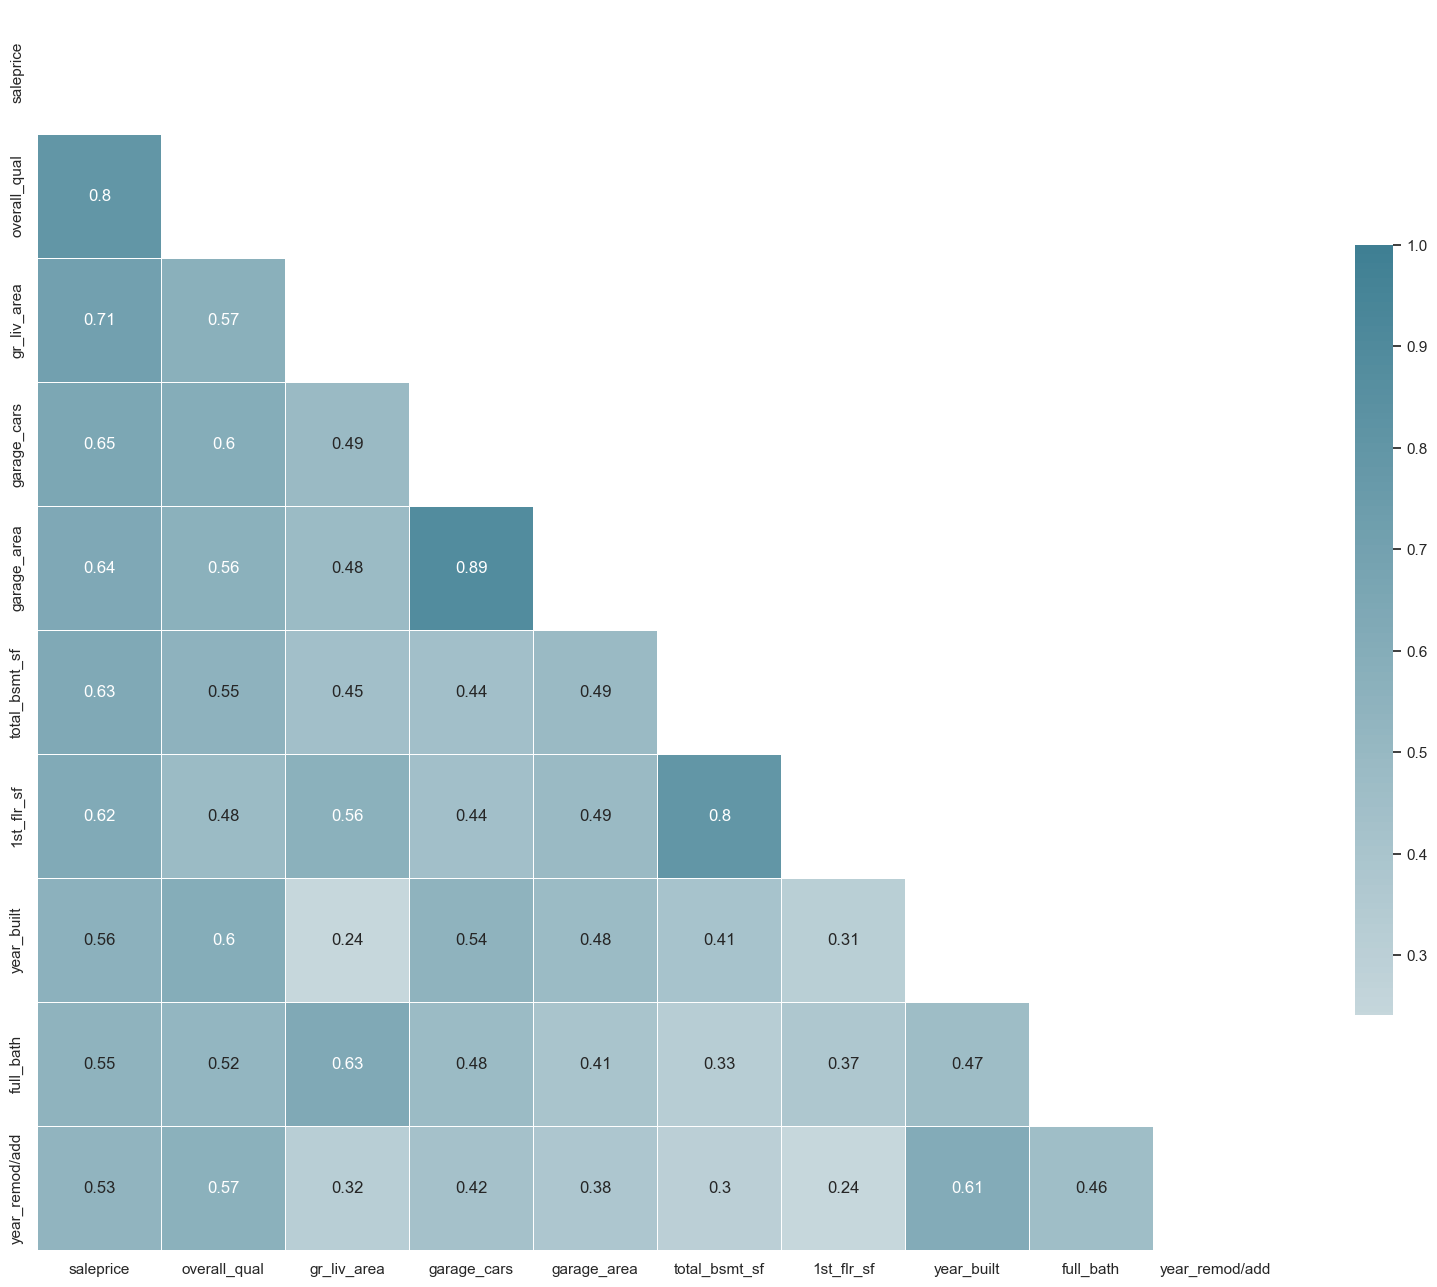

In [51]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[most_corr_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool) # Return an array of zeros with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of arr

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(np.abs(corr), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5}); # annot argument adds numbers

Select some columns

In [52]:
['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'garage_finish', 'garage_cars', 'garage_area', 'garage_qual',
       'garage_cond', 'paved_drive', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'pool_qc',
       'fence', 'misc_feature', 'misc_val', 'mo_sold', 'yr_sold', 'sale_type',
       'sale_condition', 'saleprice']

['order',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_

In [53]:
# could also export columns to a csv file and then import 

# Modeling workflow overview

1. Select features and target
2. T-T split
3. Fit model
4. Model prediction
5. View residuals
6. Assess model
7. View features

# Model 1:  single var Lin reg

Select features and target

In [54]:
selected_features_1 = most_corr_columns.drop('saleprice')[0] # drop the target variable
selected_features_1

'overall_qual'

In [55]:
X1 = df.loc[:,[selected_features_1]]
y1 = df['saleprice']

T-T split

In [56]:
#Split the data 70-30 train/test

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((2051, 1), (879, 1), (2051,), (879,))

Fit model

In [57]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train1, y_train1)

LinearRegression()

In [58]:
lr_model1.coef_, lr_model1.intercept_

(array([44369.05645059]), -89974.33932082876)

Single var against target

In [59]:
# yhat = 44369.06(overall_qual) - 89974.34

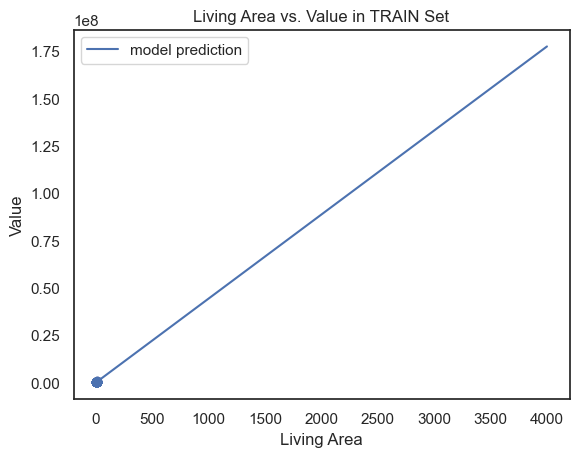

In [60]:
plt.scatter(X_train1,y_train1,alpha=.05, label=None)
vec1 = np.linspace(0,4000,1000) # just a set of X points to grab y-hat
    # np.linspace(min, max, n points)
pred_vec1 = lr_model1.intercept_ + lr_model1.coef_[0]*vec1 
                                        # coef[0] because even though only one coef, returns array
plt.plot(vec1, pred_vec1, label='model prediction')
plt.title('Living Area vs. Value in TRAIN Set')
plt.xlabel('Living Area');
plt.ylabel('Value')
plt.legend()
plt.show()

Model prediction

In [61]:
### Get the predictions on the training set
# train_set_pred1 = lr_model1.predict(X_train.loc[:,[selected_features_1]])
train_set_pred1 = lr_model1.predict(X_train1)

In [62]:
### Get the predictions on the test set
test_set_pred1 = lr_model1.predict(X_test1)

test_set_pred1

array([264978.11228392, 176239.99938273, 220609.05583333,  87501.88648155,
       176239.99938273, 176239.99938273, 264978.11228392, 176239.99938273,
        87501.88648155, 264978.11228392, 220609.05583333, 264978.11228392,
        87501.88648155, 131870.94293214,  43132.83003095, 176239.99938273,
       176239.99938273, 220609.05583333, 131870.94293214, 176239.99938273,
       220609.05583333, 131870.94293214, 176239.99938273, 220609.05583333,
       220609.05583333, 264978.11228392, 353716.22518511, 220609.05583333,
       220609.05583333, 220609.05583333, 220609.05583333,  87501.88648155,
       264978.11228392,  87501.88648155, 176239.99938273,  87501.88648155,
       220609.05583333, 264978.11228392, 176239.99938273, 220609.05583333,
       309347.16873451, 176239.99938273, 220609.05583333, 176239.99938273,
       131870.94293214, 264978.11228392, 176239.99938273, 131870.94293214,
       131870.94293214, 131870.94293214, 220609.05583333, 131870.94293214,
       176239.99938273, 2

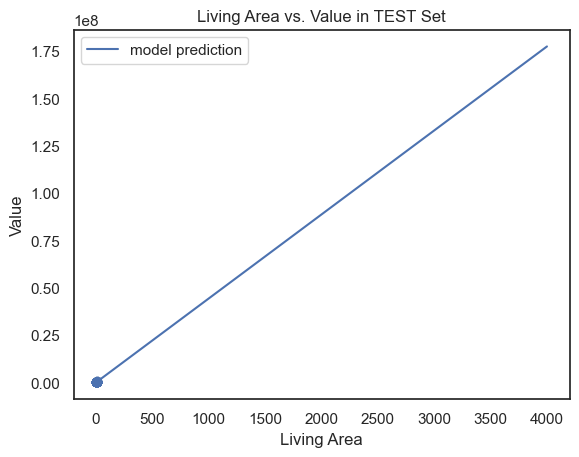

In [63]:
### Plot the regression line on top of the data
plt.scatter(X_test1,y_test1,alpha=.1, label=None)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, pred_vec1, label='model prediction')
plt.title('Living Area vs. Value in TEST Set')
plt.xlabel('Living Area')
plt.ylabel('Value')
plt.legend()
plt.show()

Plot residuals

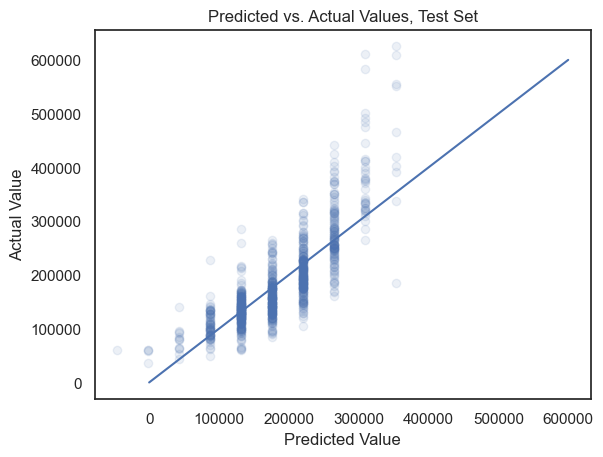

In [64]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred1,y_test1,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show();

Plot residuals AV

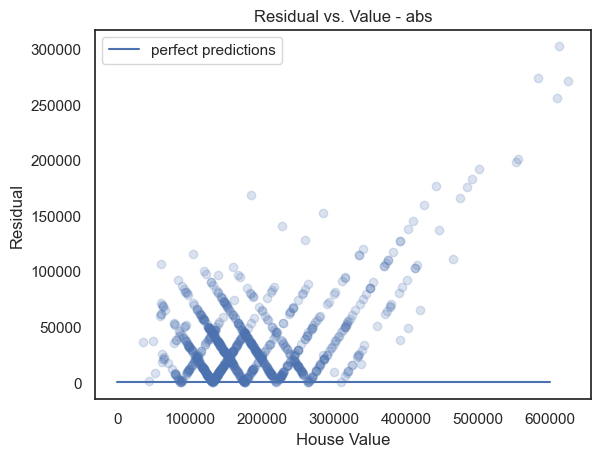

In [65]:
## Residual Plot - ABSOLUTE VAL
## Plot predicted vs actual 
residual1 = np.abs(y_test1-test_set_pred1)

plt.scatter(y_test1, residual1, alpha=.2, label=None)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000), label='perfect predictions');
plt.xlabel('House Value')
plt.ylabel('Residual')
plt.title('Residual vs. Value - abs')
plt.legend()
plt.show()

Assess model

In [67]:
# r2
lr_model1.score(X_test1, y_test1)

0.658290464307834

In [68]:
mae1 = mean_absolute_error(y_test1,test_set_pred1)
train_mae1 = mean_absolute_error(y_train1,lr_model1.predict(X_train1))
print(f"Train MAD: {train_mae1:.2f}")
print(f"Val MAD: {mae1:.2f}")

Train MAD: 33366.62
Val MAD: 34331.89


In [69]:
rmse1 = np.sqrt(mean_squared_error(y_test1,test_set_pred1))
train_rmse1 = np.sqrt(mean_squared_error(y_train1,lr_model1.predict(X_train1)))
print(f"Train RMSE: {train_rmse1:.2f}")
print(f"Val RMSE: {rmse1:.2f}")

Train RMSE: 47588.82
Val RMSE: 49010.43


Overfit example
- Train RMSE: 12,245.36
- Test RMSE: 55,396.91<br>
(poor performance on unseen data means bad generalization)


Underfit example
- Train RMSE: 654,245.36
- Test RMSE: 655,396.91

# Model 2: multivar regression

Select features and target

In [70]:
selected_features_2 = most_corr_columns.drop('saleprice') # drop the target variable

selected_features_2

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add'],
      dtype='object')

In [71]:
X2 = df.loc[:,selected_features_2]
y2 = df['saleprice']

T-T split

In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape


((2051, 9), (879, 9), (2051,), (879,))

Fit model

In [73]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train2, y_train2)
lr_model2.coef_, lr_model2.intercept_

(array([ 1.98515177e+04,  5.21672329e+01,  8.44095365e+03,  1.95595996e+01,
         1.85442943e+01,  1.26502088e+01,  3.19218854e+02, -8.78313742e+03,
         2.98613379e+02]),
 -1285218.731379103)

Model prediction

In [74]:
### Get the predictions on the training set
train_set_pred2 = lr_model2.predict(X_train2)

In [75]:
### Get the predictions on the test set
test_set_pred2 = lr_model2.predict(X_test2)

test_set_pred2

array([196591.69250246, 126219.42318515, 217816.45043103, 100188.40661623,
       124953.18500544, 191467.07762301, 204630.75744762, 165275.51472642,
        72889.81257278, 312360.16924163, 241498.5697405 , 238253.24217691,
        91157.71482417, 182710.236613  ,  96246.42550053, 161322.6767913 ,
       162578.95957576, 213025.10801288, 138812.7328001 , 149857.46887   ,
       219399.02672965, 144259.56532462, 198646.96735691, 221075.9661368 ,
       212085.86925612, 290564.26904552, 331004.45773531, 232162.37754866,
       214747.55660723, 223337.23876111, 207912.64148167,  58433.90438981,
       255478.94864744,  97831.06043513, 147891.23722711,  94274.51054321,
       210111.78227169, 279326.07563119, 205957.82870478, 227765.23602411,
       322607.97058242, 193228.6499881 , 226228.40309959, 201477.92610962,
        96399.79092529, 299104.70161738, 182262.00172857, 165829.59727206,
       158319.60350061, 124800.52156504, 196981.58804636, 124872.4672592 ,
       148429.64679067, 2

View residuals

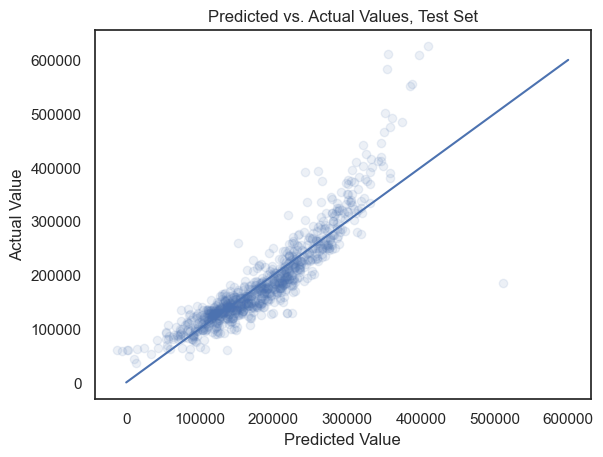

In [76]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred2,y_test2,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Assess model

In [77]:
# r2
lr_model2.score(X_test2, y_test2)

0.812914021381136

In [78]:
mae2 = mean_absolute_error(y_test2,test_set_pred2)
train_mae2 = mean_absolute_error(y_train2,train_set_pred2)
print(f"Train MAD: {train_mae2:.2f}")
print(f"Val MAD: {mae2:.2f}")

Train MAD: 23604.57
Val MAD: 23472.66


In [79]:
rmse2 = np.sqrt(mean_squared_error(y_test2,test_set_pred2))
train_rmse2 = np.sqrt(mean_squared_error(y_train2,train_set_pred2))
print(f"Train RMSE: {train_rmse2:.2f}")
print(f"Val RMSE: {rmse2:.2f}")

Train RMSE: 36245.83
Val RMSE: 36264.41


View features

In [80]:
list(zip(X_train2.columns,lr_model2.coef_))

[('overall_qual', 19851.517684062997),
 ('gr_liv_area', 52.16723289775298),
 ('garage_cars', 8440.953650466643),
 ('garage_area', 19.55959960582267),
 ('total_bsmt_sf', 18.544294322148257),
 ('1st_flr_sf', 12.650208815522566),
 ('year_built', 319.21885401378),
 ('full_bath', -8783.137419001609),
 ('year_remod/add', 298.6133789972611)]

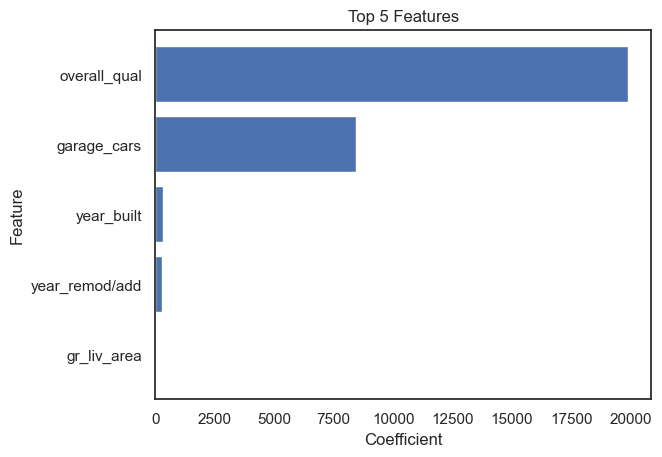

In [81]:
feature_df2 = pd.DataFrame(list(zip(X2.columns, lr_model2.coef_,))).rename(columns={0:'feature', 1: 'coefficient'})
feature_df2.sort_values(by = 'coefficient', ascending= False)
# most important features
plt.barh(feature_df2.sort_values(by = 'coefficient').tail(5).feature, 
         feature_df2.sort_values(by = 'coefficient').tail(5).coefficient)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.show();

Learning curve

In [82]:
# # Copied & edited from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import ShuffleSplit
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer


# def plot_learning_curve(estimator, title, X, y, scoring=None, axes=None, ylim=None, cv=None,
#                         n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")

#     train_sizes, train_scores, test_scores, fit_times, _ = \
#         learning_curve(estimator, 
#                        X, 
#                        y, 
#                        cv=cv, 
#                        scoring=scoring,
#                        n_jobs=n_jobs, 
#                        train_sizes=train_sizes, 
#                        return_times=True)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)

#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
#                          train_scores_mean + train_scores_std, alpha=0.1,
#                          color="r")
#     axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1,
#                          color="g")
#     axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
#                  label="Training score")
#     axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
#                  label="Cross-validation score")
#     axes[0].legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt



# title = "Learning Curves Linear Regression"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# estimator = LinearRegression()
# plot_learning_curve(estimator, title, X, y, scoring=make_scorer(r2_score), cv=cv, n_jobs=4)


# plt.show()

# Model 3: top 20

Select features and target

In [83]:
selected_features_3 = df[numeric_columns].corr().nlargest(20, 'saleprice')['saleprice'].index
selected_features_3 = selected_features_3.drop('saleprice')
selected_features_3

Index(['overall_qual', 'gr_liv_area', 'garage_cars', 'garage_area',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'full_bath',
       'year_remod/add', 'mas_vnr_area', 'totrms_abvgrd', 'fireplaces',
       'bsmtfin_sf_1', 'wood_deck_sf', 'open_porch_sf', 'half_bath',
       'bsmt_full_bath', '2nd_flr_sf', 'lot_area'],
      dtype='object')

In [84]:
X3 = df.loc[:,selected_features_3]
y3 = df['saleprice']

T-t split

In [85]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

Fit model

In [86]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train3,y_train3) # fit on all available features of Xtrain

LinearRegression()

Model prediction

In [87]:
### Get the predictions on the training set
train_set_pred3 = lr_model3.predict(X_train3)

In [88]:
### Get the predictions on the test set
test_set_pred3 = lr_model3.predict(X_test3)

test_set_pred3

array([198515.64776249, 127651.76224049, 215403.20346491, 103693.57025729,
       128944.37142264, 176001.17661681, 203150.61677228, 160919.35074782,
        70454.97878089, 315885.34267256, 244384.76265219, 247229.13290137,
        82148.54439007, 152332.09828382, 104842.59863742, 174712.37330523,
       155802.54498122, 204519.57475889, 127202.29306107, 157054.6133297 ,
       200271.09123894, 144509.38388446, 208898.22495014, 219731.00310355,
       204245.6513627 , 305111.31888169, 312367.97697519, 238472.84510259,
       211096.73211844, 210369.87502347, 199404.07180727,  60133.4653487 ,
       231339.56639412,  81100.42141693, 143137.10196878,  81280.47263258,
       190846.24195709, 280832.12732556, 190409.19293766, 238404.6323575 ,
       316855.62748754, 223262.89955232, 235354.01649108, 221208.64077985,
        96545.36603385, 310909.69157273, 166025.75252483, 164106.27976476,
       160332.06377586, 129353.48943741, 189906.56066163, 128740.51966792,
       147197.74141752, 1

View residuals

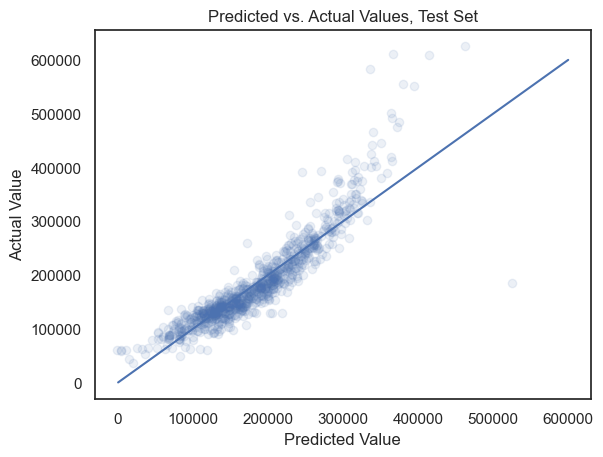

In [89]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred3, y_test3, alpha=.1)
plt.plot(np.linspace(0, 600000, 1000), np.linspace(0, 600000, 1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show();

Assess model

In [90]:
# r2
lr_model3.score(X_test3, y_test3)

0.832482751899066

In [91]:
mae3 = mean_absolute_error(y_test3, test_set_pred3)
train_mae3 = mean_absolute_error(y_train3, train_set_pred3)
print(f"Train MAD: {train_mae3:.2f}")
print(f"Val MAD: {mae3:.2f}")

Train MAD: 21663.03
Val MAD: 21693.96


In [92]:
rmse3 = np.sqrt(mean_squared_error(y_test3, test_set_pred3))
train_rmse3 = np.sqrt(mean_squared_error(y_train3, train_set_pred3))
print(f"Train RMSE: {train_rmse3:.2f}")
print(f"Val RMSE: {rmse3:.2f}")

Train RMSE: 34243.91
Val RMSE: 34315.45


View features

In [93]:
list(zip(X_train3.columns,lr_model3.coef_))[:10]

[('overall_qual', 19317.123426654274),
 ('gr_liv_area', 26.531213101827284),
 ('garage_cars', 7403.254095687228),
 ('garage_area', 15.650215679317256),
 ('total_bsmt_sf', 10.317511416264113),
 ('1st_flr_sf', 25.02361787966227),
 ('year_built', 243.5475331221053),
 ('full_bath', -3820.5839643234917),
 ('year_remod/add', 338.32975987428733),
 ('mas_vnr_area', 29.514917254001453)]

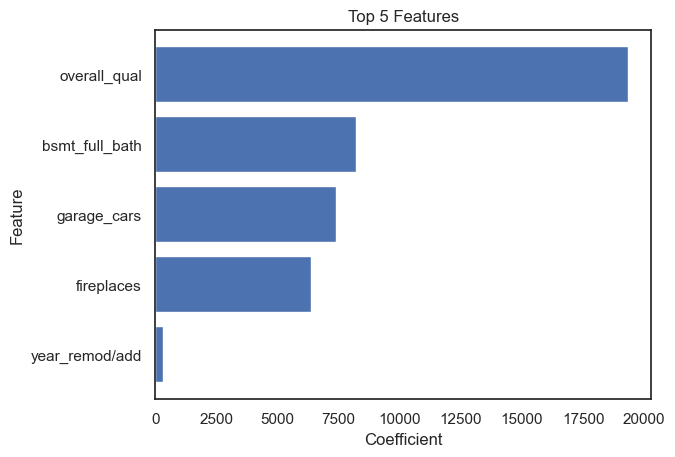

In [94]:
feature_df3 = pd.DataFrame(list(zip(X3.columns, lr_model3.coef_,))).rename(columns={0:'feature', 1: 'coefficient'})
feature_df3.sort_values(by = 'coefficient', ascending= False)
# most important features
plt.barh(feature_df3.sort_values(by = 'coefficient').tail(5).feature, 
         feature_df3.sort_values(by = 'coefficient').tail(5).coefficient)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.show();

Update model data file

In [101]:
# Define the model names and their performance stats
model_comparison = {
    'Model': ['LR_single_feat', 'LR_all_feat', 'LR_top_20_feat'],
    'R2': [lr_model1.score(X_test1, y_test1), lr_model2.score(X_test2, y_test2), lr_model3.score(X_test3, y_test3)],
    'Train_MAE': [train_mae1, train_mae2, train_mae3],
    'Train_RMSE': [train_rmse1, train_rmse2, train_rmse3],
    'Val_MAE': [mae1, mae2, mae3],
    'Val_RMSE': [rmse1, rmse2, rmse3]
}

# Create a DataFrame
model_comparison_df = pd.DataFrame(model_comparison)

# Save the DataFrame to a CSV file
model_comparison_df.to_csv('model_comparison.csv', index=False)

# Display the DataFrame
model_comparison_df

,Model,R2,Train_MAE,Train_RMSE,Val_MAE,Val_RMSE
0,LR_single_feat,0.658290,33366.620987,47588.821126,34331.889385,49010.433084
1,LR_all_feat,0.812914,23604.571316,36245.825551,23472.656831,36264.409574
2,LR_top_20_feat,0.832483,21663.030622,34243.914882,21693.955732,34315.454551
